In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import datetime

In [2]:
df=pd.read_csv("reliance_stock.csv",index_col='Date',parse_dates=True)

In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-04,1950.000000,1967.800049,1911.000000,1916.599976,1916.599976,10083693.0
2021-05-05,1923.349976,1938.500000,1908.050049,1920.099976,1920.099976,5719649.0
2021-05-06,1921.849976,1935.000000,1906.599976,1931.000000,1931.000000,6749281.0
2021-05-07,1937.750000,1955.650024,1926.000000,1931.750000,1931.750000,5671163.0
2021-05-10,1939.000000,1945.500000,1922.699951,1928.750000,1928.750000,1746437.0


In [4]:
x=df.drop(['Close','Adj Close'],axis=1)
y=df['Adj Close']

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.02)

In [5]:
for i in df.iloc[:]:
    
    mean_value=df[i].mean()
    df.fillna(value=mean_value,inplace=True)

In [6]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<AxesSubplot:xlabel='Date'>

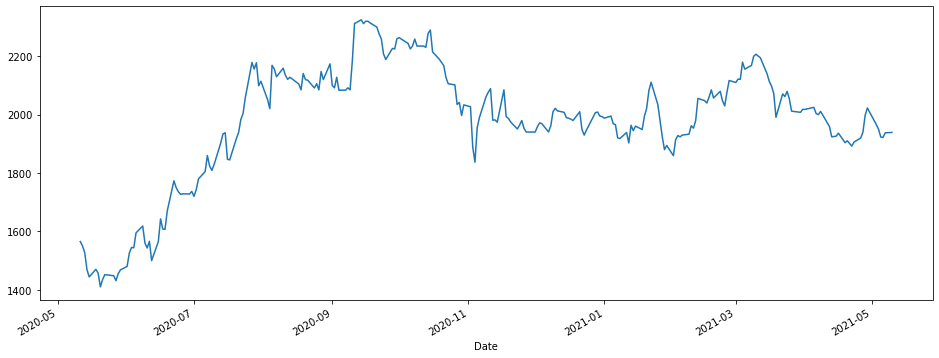

In [7]:
df['Open'].plot(figsize=(16,6))

In [8]:
#7day rolling mean
df.rolling(7).mean().head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-11,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-12,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-13,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-14,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-15,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-18,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-19,1497.467198,1512.508318,1448.454259,1466.971958,1461.484323,2.971593e+07
2020-05-20,1475.300938,1490.653285,1424.949097,1448.644252,1443.225185,2.894034e+07
2020-05-21,1458.857143,1477.485683,1421.200004,1445.199986,1439.793806,2.488474e+07


<AxesSubplot:xlabel='Date'>

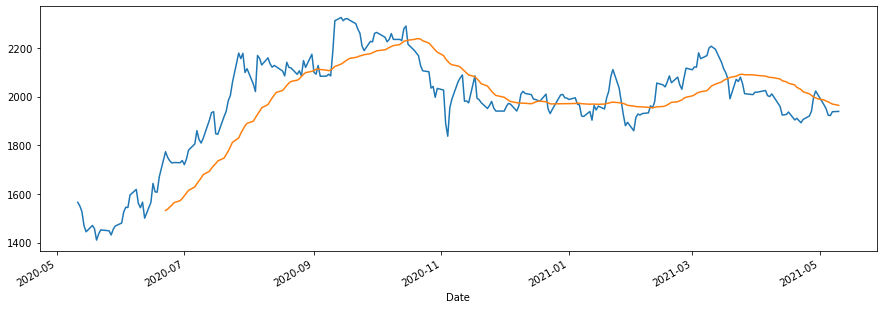

In [9]:
df['Open'].plot(figsize=(15,5))
df.rolling(window=30).mean()['Close'].plot()

<AxesSubplot:xlabel='Date'>

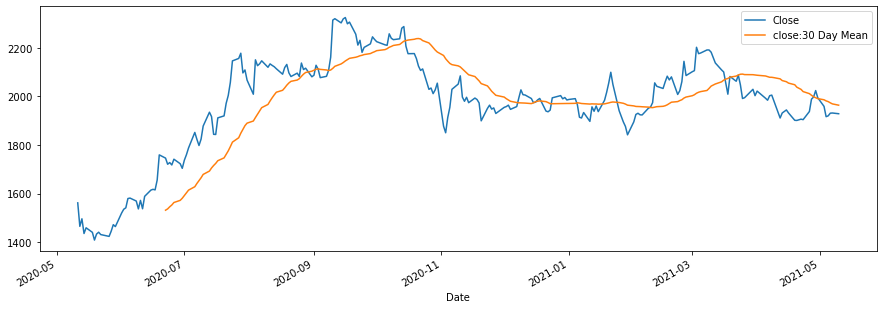

In [10]:
df['close:30 Day Mean']=df['Close'].rolling(window=30).mean()
df[['Close','close:30 Day Mean']].plot(figsize=(15,5))

<AxesSubplot:xlabel='Date'>

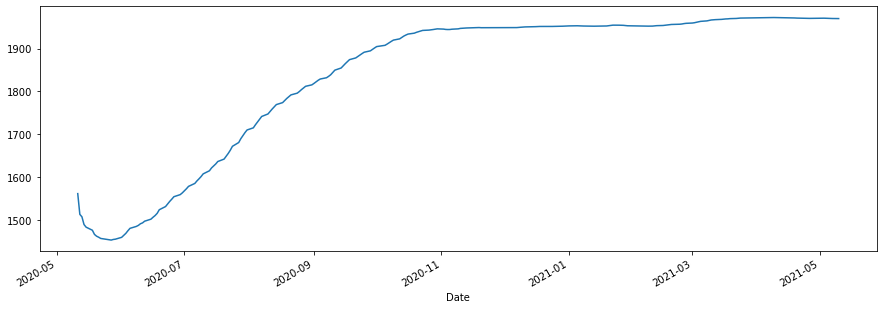

In [11]:
df['Close'].expanding(min_periods=1).mean().plot(figsize=(15,5))
#min 1 observation per window i,e 30 in this case

In [12]:
train_set=df['Open']
train_set=pd.DataFrame(train_set)
train_set

,Open
Date,
2020-05-11,1565.163818
2020-05-12,1550.106567
2020-05-13,1527.000000
2020-05-14,1469.000000
2020-05-15,1444.000000
...,...
2021-05-04,1950.000000
2021-05-05,1923.349976
2021-05-06,1921.849976


In [13]:
train_set.isna().any()

Open    False
dtype: bool

In [15]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(train_set)

In [16]:
x=df[df.drop([''])]

KeyError: "[''] not found in axis"

In [17]:
#creating a data structure with 60  timesteps and 1 output
X_train=[]
y_train=[]
for i in range(60,251):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
    
X_train,y_train=np.array(X_train),np.array(y_train)  
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [ ]:
pip install keras

In [ ]:
pip install tensorflow

In [ ]:
 from tensorflow.python._pywrap_tensorflow_internal import *

In [ ]:
#feature extraction


#part 2 - building the RNN
import tensorflow as tf
 from tensorflow.python._pywrap_tensorflow_internal import *

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
#initiating the RNN
regressor=Sequential()

In [ ]:
#adding the first lstm layer and some dropout regularization
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

#SECOND LAYER
regressor.add(LSTM(units=50,return_sequences=True
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True)
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True)
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [ ]:
#compiling the rnn
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

In [ ]:
#part 3 making prediction and virtualization
make test dataset or split it from df

In [ ]:
pred=regressor.predict(x_test)
pred=sc.inverse_transform(pred)
pred=pd.DataFrame(pred)


In [ ]:
plt.plot(y_test,color='red',label='reliance real stock prices')
plt.plot(pred,color='blue',label='predicted reliance price')
plt.xlabel('Time')
plt.title("stock price prediction")
plt.legend()
plt.show()